# Setup TensorFlow

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf; 
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.6.0


# Load MNIST data


In [ ]:
import numpy as np
import math

from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

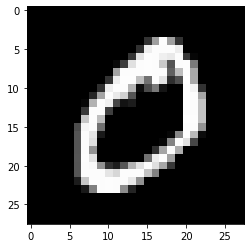

The data label is 0


In [ ]:
#shows the what the imput looks like
from matplotlib import pyplot as plt

plt.imshow(train_data[1], cmap='gray', vmin=0, vmax=255)
plt.show()

print("The data label is " + str(train_labels[1]))

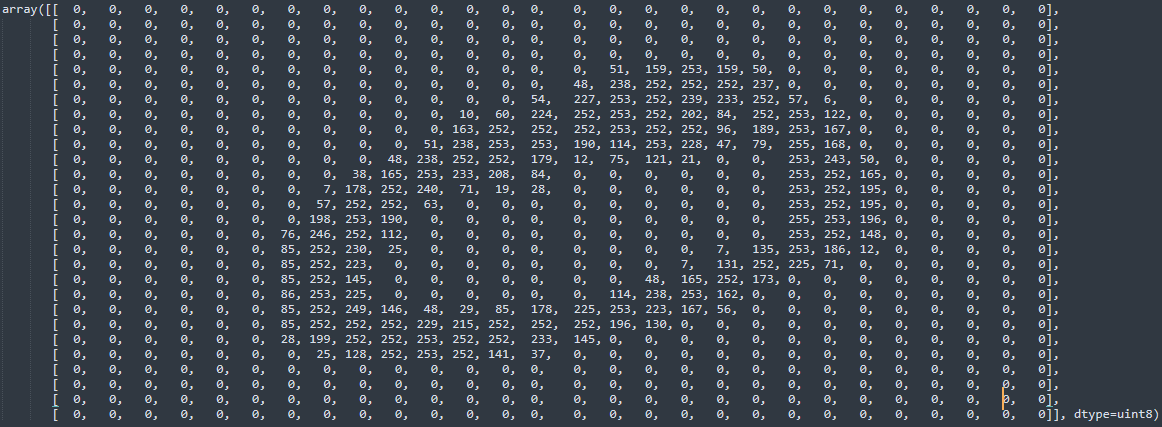

# Preprocess data



In [ ]:
#add 1 channel dimension for softmax
test_data = np.expand_dims(test_data, 3)
train_data = np.expand_dims(train_data, 3)

#prepare data for loss function -> cross entrophy in our example
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

print(test_data.shape)
print(train_data.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


# Parameters


In [ ]:
BATCH_SIZE = 64;
EPOCHS = 15;
START_LEARNING_RATE = 0.01;
DROPOFF_LEARNING_RATE = 0.666;
DROPOUT_COEFFICIENT = 0.2;

# Model definition


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(kernel_size=3, filters=12, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(kernel_size=6, filters=24, padding='same', strides=2, use_bias=False),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(kernel_size=6, filters=32, padding='same', strides=2, use_bias=False),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Flatten(), #we need to flatten the Conv2D output so tha we can use dense layer on it
    # tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(DROPOUT_COEFFICIENT),

    tf.keras.layers.Dense(200, use_bias=False),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(DROPOUT_COEFFICIENT),

    tf.keras.layers.Dense(80, use_bias=False),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(DROPOUT_COEFFICIENT),

    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer=tf.keras.optimizers.Adam()

model.compile(optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 28, 28, 12)        108       
_________________________________________________________________
batch_normalization_88 (Batc (None, 28, 28, 12)        36        
_________________________________________________________________
activation_88 (Activation)   (None, 28, 28, 12)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 14, 14, 24)        10368     
_________________________________________________________________
batch_normalization_89 (Batc (None, 14, 14, 24)        72        
_________________________________________________________________
activation_89 (Activation)   (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 7, 7, 32)        

# Learning rate decay function


In [ ]:
def learning_rate_decay(epoch):
  return START_LEARNING_RATE * math.pow(DROPOFF_LEARNING_RATE, epoch)

  # eq:0.01 * 0.666^epoch
  # 0: 0.01 * 0.666^0 (= 1) => 0.01
  # 1: 0.01 * 0.666^1 (= 0.666) => 0.00666
  # 0: ...
  #

learning_rate_decay_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_decay, verbose=True)

# Train and validate


In [ ]:
steps_per_epoch = int( np.ceil(train_data.shape[0] / BATCH_SIZE) );

history = model.fit(x=train_data, # images 
                    y=train_labels, # true labels of the train data
                    steps_per_epoch= steps_per_epoch, # steps per epoch
                    epochs=EPOCHS, #number of iterations of the model
                    validation_data=(test_data,test_labels),  #set the data that we use for validation
                    validation_steps=1, # batches for validation, we go 1 by 1
                    callbacks=[learning_rate_decay_callback]) #set the callbacks to the function

Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
938/938 [==============================] - 11s 10ms/step - loss: 0.1551 - accuracy: 0.9527 - val_loss: 0.0603 - val_accuracy: 0.9810
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.00666.
938/938 [==============================] - 9s 9ms/step - loss: 0.0604 - accuracy: 0.9826 - val_loss: 0.0560 - val_accuracy: 0.9812
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.004435560000000001.
938/938 [==============================] - 9s 9ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0292 - val_accuracy: 0.9904
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0029540829600000007.
938/938 [==============================] - 8s 9ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0263 - val_accuracy: 0.9921
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0019674192513600007.
938/938 [======================

# Visualise


Setup

In [ ]:
from matplotlib.pyplot import figure

Model Accuracy

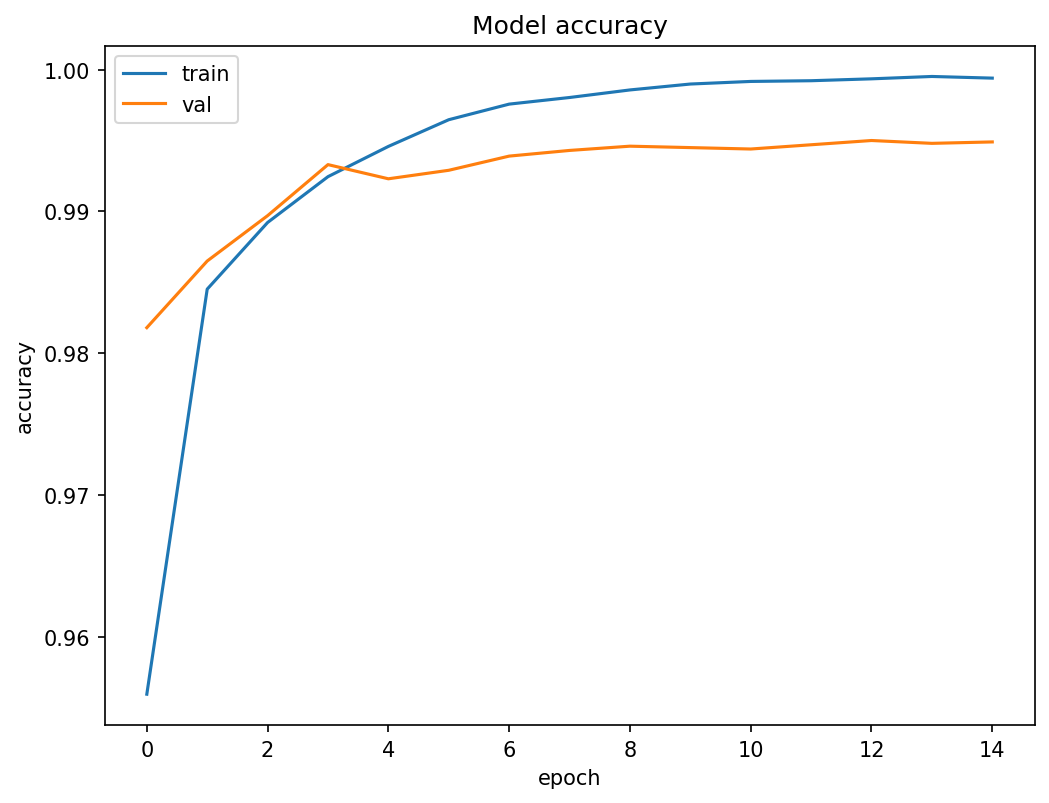

In [ ]:
figure(figsize=(8, 6), dpi=150)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model loss


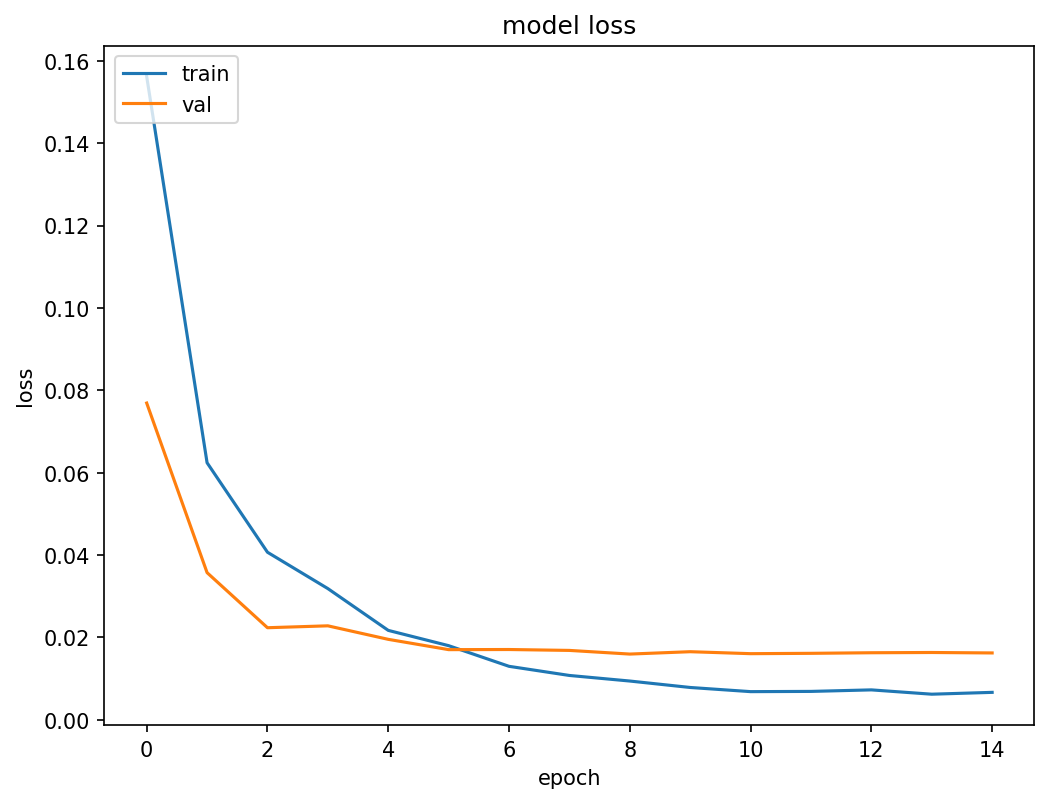

In [ ]:
figure(figsize=(8, 6), dpi=150)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Save the model


In [ ]:
model.save('MNIST_99.50%_Martin_Pazout.h5')